In [ ]:
# Breast Cancer Classifier - AIxGRC Aligned

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.9707602339181286

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



In [ ]:
# Explore class distribution (malignant vs. benign)

print("Target labels: 0 = malignant, 1 = benign\n")
print("Class distribution (raw count):")
print(y.value_counts())

print("\nClass distribution (percentages):")
print(y.value_counts(normalize=True) * 100)

Target labels: 0 = malignant, 1 = benign

Class distribution (raw count):
1    357
0    212
Name: count, dtype: int64

Class distribution (percentages):
1    62.741652
0    37.258348
Name: proportion, dtype: float64



Total samples: 569


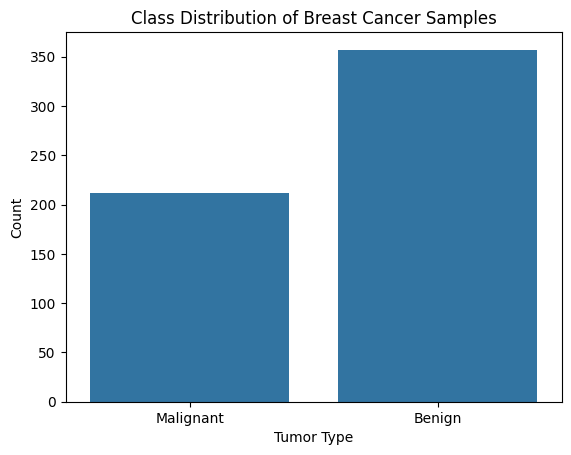

In [ ]:
print(f"\nTotal samples: {len(y)}")
# Simple bar plot of class distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y.map({0: "Malignant", 1: "Benign"}))
plt.title("Class Distribution of Breast Cancer Samples")
plt.ylabel("Count")
plt.xlabel("Tumor Type")
plt.show()


# AI Risk Register: Breast Cancer Classifier (AIxGRC)

| Risk ID | Description | Impact | Likelihood | Mitigation / Control |
|---------|-------------|--------|------------|-----------------------|
| R1 | Misclassification of malignant tumors as benign | High | Medium | Track recall for malignant class; add alerts around false negatives |
| R2 | Overreliance on a few features (e.g., mean radius) | Medium | Medium | Feature importance plotted; retraining plan in place |
| R3 | Dataset does not include patient demographic diversity (e.g., age, ethnicity) | High | Unknown | Add data notes and disclaimer; avoid overgeneralization |
| R4 | Use of model outside intended educational purpose | High | High | Clear licensing and disclaimer in README and model card |
| R5 | Lack of audit logging or version control | Medium | Low | Placeholder for Git-based versioning and audit trail |
